In [18]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_train.csv')
test_df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_test.csv')
y = df['Transported']
x = df.drop(['Transported', 'PassengerId'], axis = 1)
col_names = x.columns

In [20]:
#this converts it from True and false to one and zero
Y = [1 if i else 0 for i in y]

In [21]:
model = RandomForestRegressor()
model.fit(x, Y)

RandomForestRegressor()

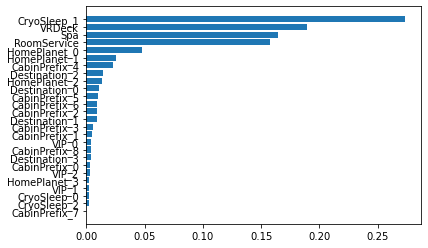

In [22]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.show()

In [23]:
#Figure above sugests that some of the features are of little to no importance so i will remove them:
importances

array([1.57853001e-01, 1.64356158e-01, 1.89725298e-01, 4.27732484e-03,
       2.71799537e-03, 3.25649559e-03, 1.13348542e-02, 8.88208536e-03,
       1.47015269e-02, 3.97298784e-03, 2.70697988e-03, 2.73382311e-01,
       2.70199318e-03, 4.78986825e-02, 2.55747995e-02, 1.38486695e-02,
       2.82753556e-03, 3.33027786e-03, 4.70187554e-03, 9.37966285e-03,
       5.46387222e-03, 2.29780549e-02, 1.03181978e-02, 9.68351962e-03,
       1.34866885e-05, 4.11235497e-03])

In [24]:
[col_names[i] for i in idxs]

['CabinPrefix_7',
 'CryoSleep_2',
 'CryoSleep_0',
 'VIP_1',
 'HomePlanet_3',
 'VIP_2',
 'CabinPrefix_0',
 'Destination_3',
 'CabinPrefix_8',
 'VIP_0',
 'CabinPrefix_1',
 'CabinPrefix_3',
 'Destination_1',
 'CabinPrefix_2',
 'CabinPrefix_6',
 'CabinPrefix_5',
 'Destination_0',
 'HomePlanet_2',
 'Destination_2',
 'CabinPrefix_4',
 'HomePlanet_1',
 'HomePlanet_0',
 'RoomService',
 'Spa',
 'VRDeck',
 'CryoSleep_1']

In [25]:
#put into func:

#to demonstrate how to use sklearn to only select the most important models:
from sklearn.feature_selection import SelectFromModel

#we already have x, y, col_names:
model = RandomForestRegressor()

#slect from model all params over a ceratn threshold
sfm = SelectFromModel(estimator=model, threshold=0.04)
x_transformed = sfm.fit_transform(x, y)

#see what we selcted:
support = sfm.get_support()

#support is just an array of true and false so to see what has been selcted:
transformed_col_names = [x for x, y in zip(col_names, support) if y == True]
transformed_col_names

['RoomService', 'Spa', 'VRDeck', 'CryoSleep_1', 'HomePlanet_0']

In [26]:
#changing the test data
#test_df = test_df[transformed_col_names]
#test_df

In [27]:
new_data = pd.DataFrame(x_transformed, columns=transformed_col_names)
new_data['Transported'] = Y

In [28]:

new_data


,RoomService,Spa,VRDeck,CryoSleep_1,HomePlanet_0,Transported
0,0.0,0.0,0.0,0.0,0.0,0
1,109.0,549.0,44.0,0.0,1.0,1
2,43.0,6715.0,49.0,0.0,0.0,0
3,0.0,3329.0,193.0,0.0,0.0,0
4,303.0,565.0,2.0,0.0,1.0,1
...,...,...,...,...,...,...
8688,0.0,1643.0,74.0,0.0,0.0,0
8689,0.0,0.0,0.0,1.0,1.0,0
8690,0.0,1.0,0.0,0.0,1.0,1
8691,0.0,353.0,3235.0,0.0,0.0,0


In [29]:
#I am getting the data from the notebooks file then passing it to this notebook to then get the most important features and put back into the training loop.
new_data.to_csv(
    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/spaceship-titanic/processed_train.csv', index=False
    )
#test_df.to_csv(
#    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/titanic/processed_test.csv', index=False
#    )

In [30]:
#This is to override the changes and see if it makes any more imporvements:
#usally I will not run this box.
#at the moment the prev scripts significantly reduct the traininng time and also increase the accuracy so i think I will keep them
#especially with the svc


#df = pd.read_csv('/Users/ethan/Desktop/Ethan/Python/ML/framework/notebooks/processed_train.csv')
#df.to_csv(
#    '/Users/ethan/Desktop/Ethan/Python/ML/framework/input/spaceship-titanic/processed_train.csv', index=False
#    )